# Continuous Control

---

This notebook uses the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Import necessary packages


In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from DDPG_agent import Agent
from itertools import count
import time

### 2. Start the Environment

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 3. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

In [4]:
# Information about the environment.
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. Instantiate the agent

In [5]:
num_agents = len(env_info.agents)
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=2)

In [6]:
def ddpg(n_episodes=1000, queue=100):
    scores_window = deque(maxlen=queue)
    scores_all = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = agent.act(states)                        # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_window.append(np.mean(scores))
        scores_all.append(np.mean(scores))
        
        print('Episode {}  Score: {:.3f}  Average Score: {:.3f}'.format(
                i_episode, np.mean(scores), np.mean(scores_window)))

        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(
                i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    return scores_all

### 5. Train DDPG agent

In [7]:
scores = ddpg()

Episode 1  Score: 0.769  Average Score: 0.769
Episode 2  Score: 0.998  Average Score: 0.883
Episode 3  Score: 0.920  Average Score: 0.896
Episode 4  Score: 0.894  Average Score: 0.895
Episode 5  Score: 0.963  Average Score: 0.909
Episode 6  Score: 1.221  Average Score: 0.961
Episode 7  Score: 1.146  Average Score: 0.987
Episode 8  Score: 1.457  Average Score: 1.046
Episode 9  Score: 1.178  Average Score: 1.061
Episode 10  Score: 1.663  Average Score: 1.121
Episode 11  Score: 1.453  Average Score: 1.151
Episode 12  Score: 2.437  Average Score: 1.258
Episode 13  Score: 2.346  Average Score: 1.342
Episode 14  Score: 3.020  Average Score: 1.462
Episode 15  Score: 2.837  Average Score: 1.554
Episode 16  Score: 3.817  Average Score: 1.695
Episode 17  Score: 3.899  Average Score: 1.825
Episode 18  Score: 4.962  Average Score: 1.999
Episode 19  Score: 5.912  Average Score: 2.205
Episode 20  Score: 6.967  Average Score: 2.443
Episode 21  Score: 8.997  Average Score: 2.755
Episode 22  Score: 11.

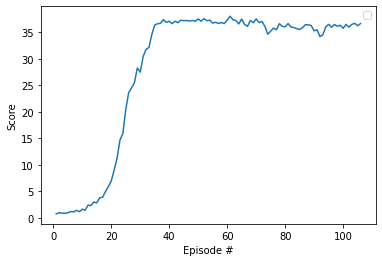

In [8]:
# plot the scores
fig = plt.figure()
plt.subplot(1, 1, 1)  # 111
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.savefig('score_per_episode_plot.png')
plt.show()

### 6. Load trained agent and watch its performance

In [9]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    # actions = np.clip(actions, -1, 1)                # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 33.74699924569577


### 7. close the environment.

In [ ]:
env.close()